#Installing GITCLONE  Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15705 (delta 9), reused 15 (delta 3), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.51 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (10750/10750), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.3 MB/s eta 0:00:00
Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


# Download Correctly Formatted Custom Dataset

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BpPamx1h0c71YxgLC2v2")
project = rf.workspace("machine-learning-final-project").project("final-project-for-machine-learning")
dataset = project.version(3).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=cfb643bc7cd079a60433c241f1dea9b9a6862c8951e5d53c7df8e358ab4f2176
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Final-Project-for-Machine-Learning-3 in yolov5pytorch:: 100%|██████████| 272/272 [00:00<00:00, 2187.10it/s]


In [ ]:
%cd /content/yolov5
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")

/content/yolov5


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- College
- Highschool
nc: 2
roboflow:
  license: CC BY 4.0
  project: final-project-for-machine-learning
  url: https://universe.roboflow.com/machine-learning-final-project/final-project-for-machine-learning/dataset/3
  version: 3
  workspace: machine-learning-final-project
test: ../test/images
train: Final-Project-for-Machine-Learning-3/train/images
val: Final-Project-for-Machine-Learning-3/valid/images


# Define Model Configuration and Architecture


In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#this is the model configuration we will use for our tutorial
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train THE YOLOv5 Detector



In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
2023-05-29 07:43:34.225271: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 07:43:35.340361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/yolov5/Final-Project-for-Machine-Learning-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze

# Evaluating the Uniform YOLOv5 with Graphs

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

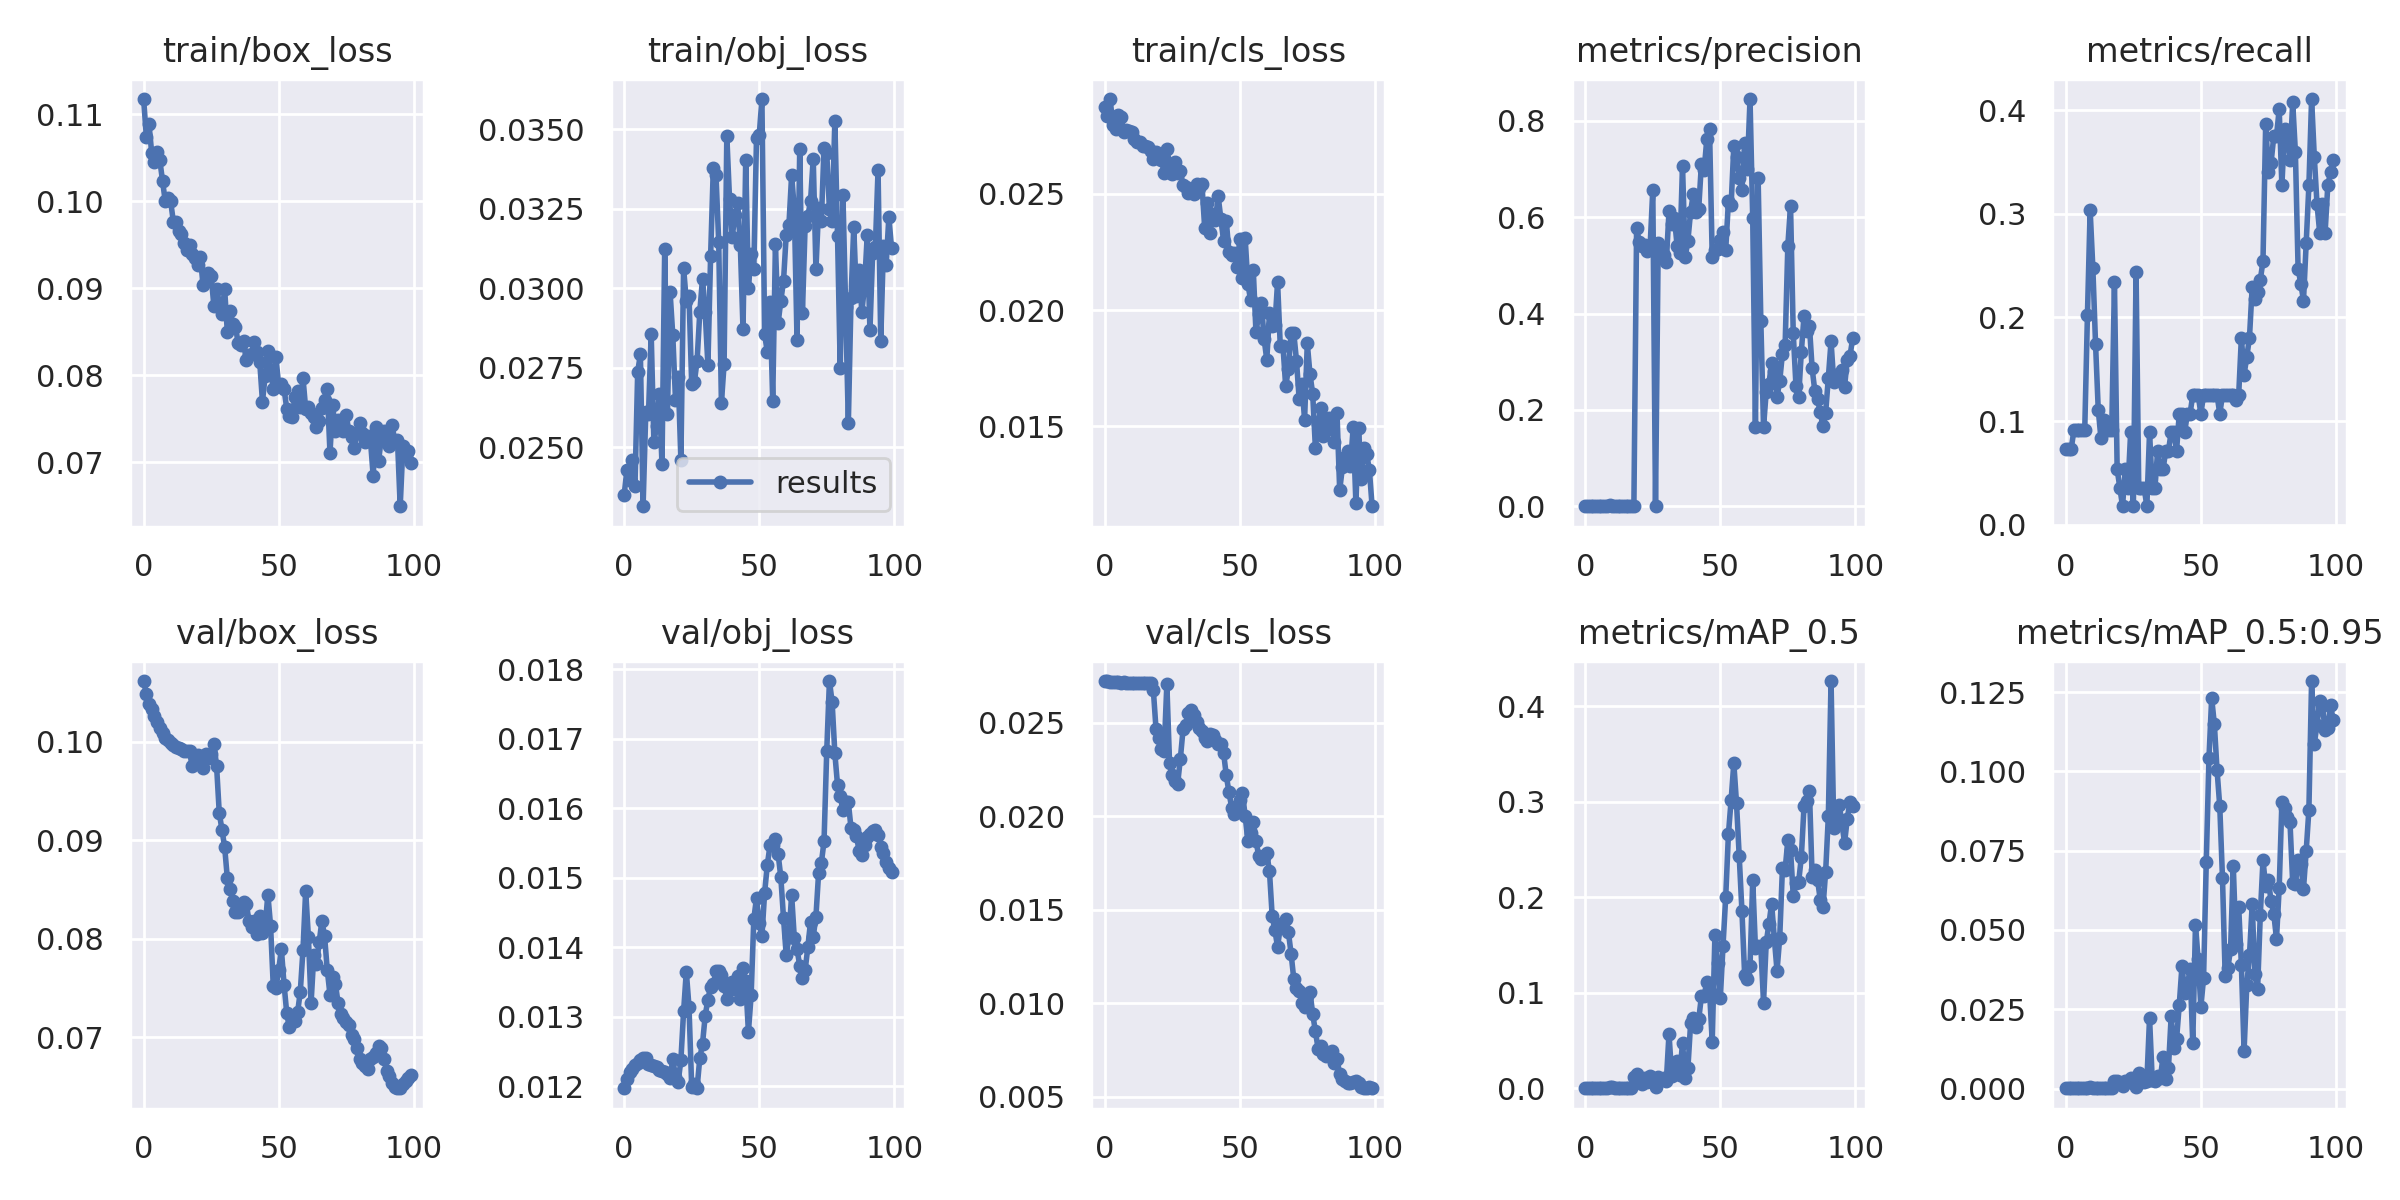

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

GROUND TRUTH TRAINING DATA:


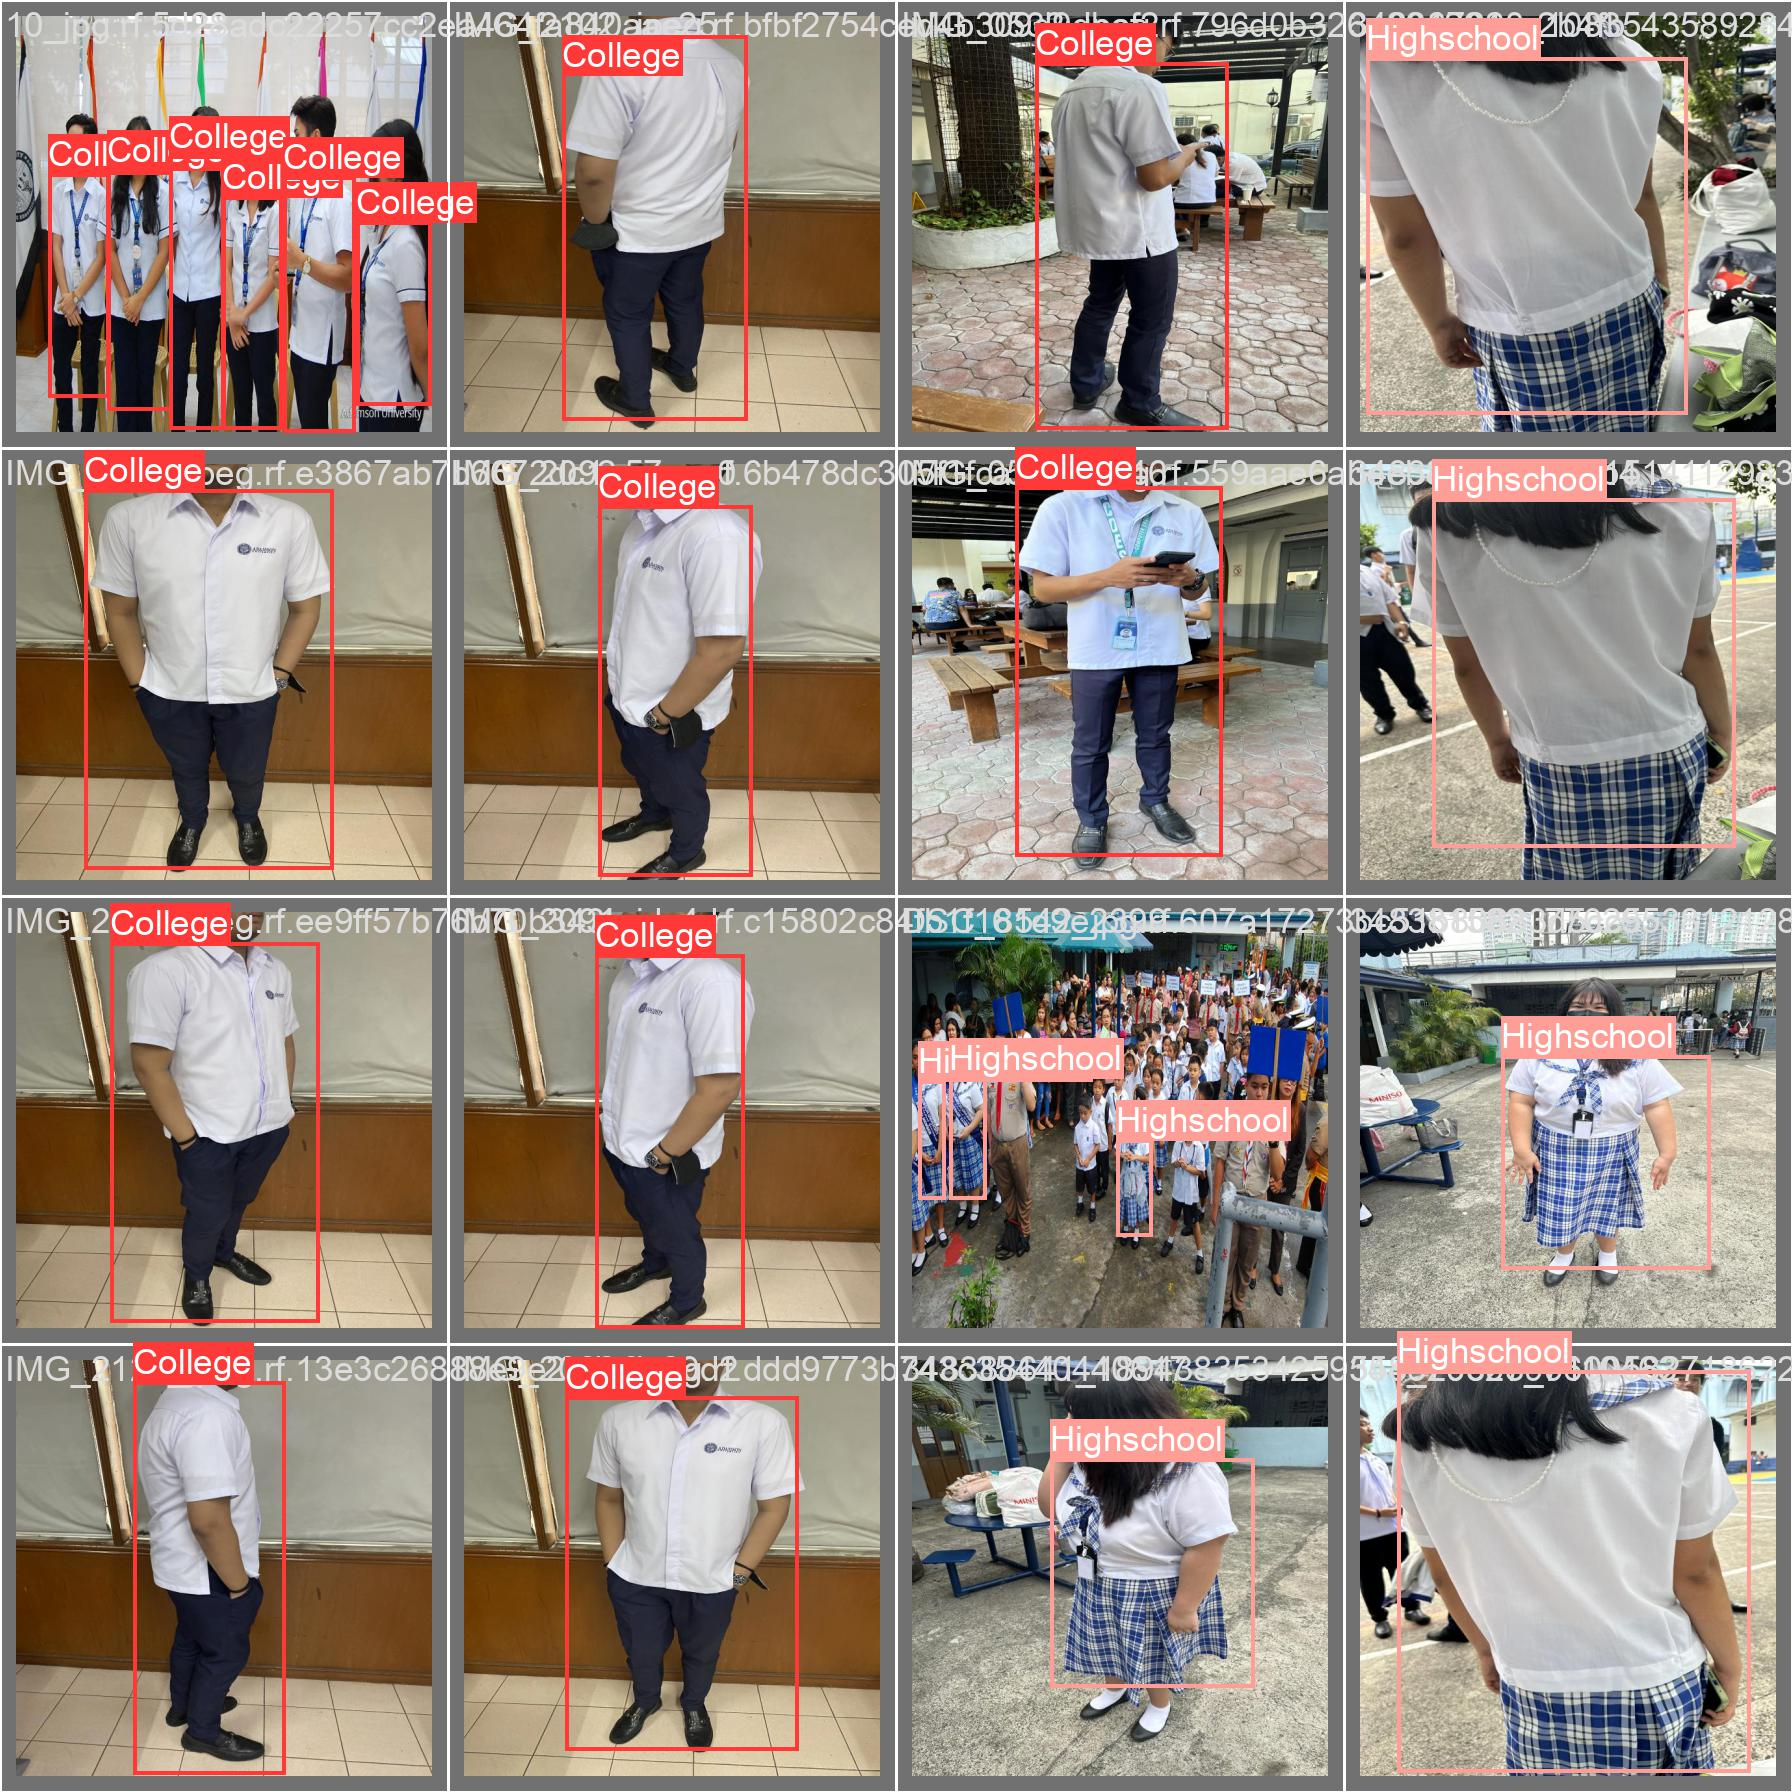

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


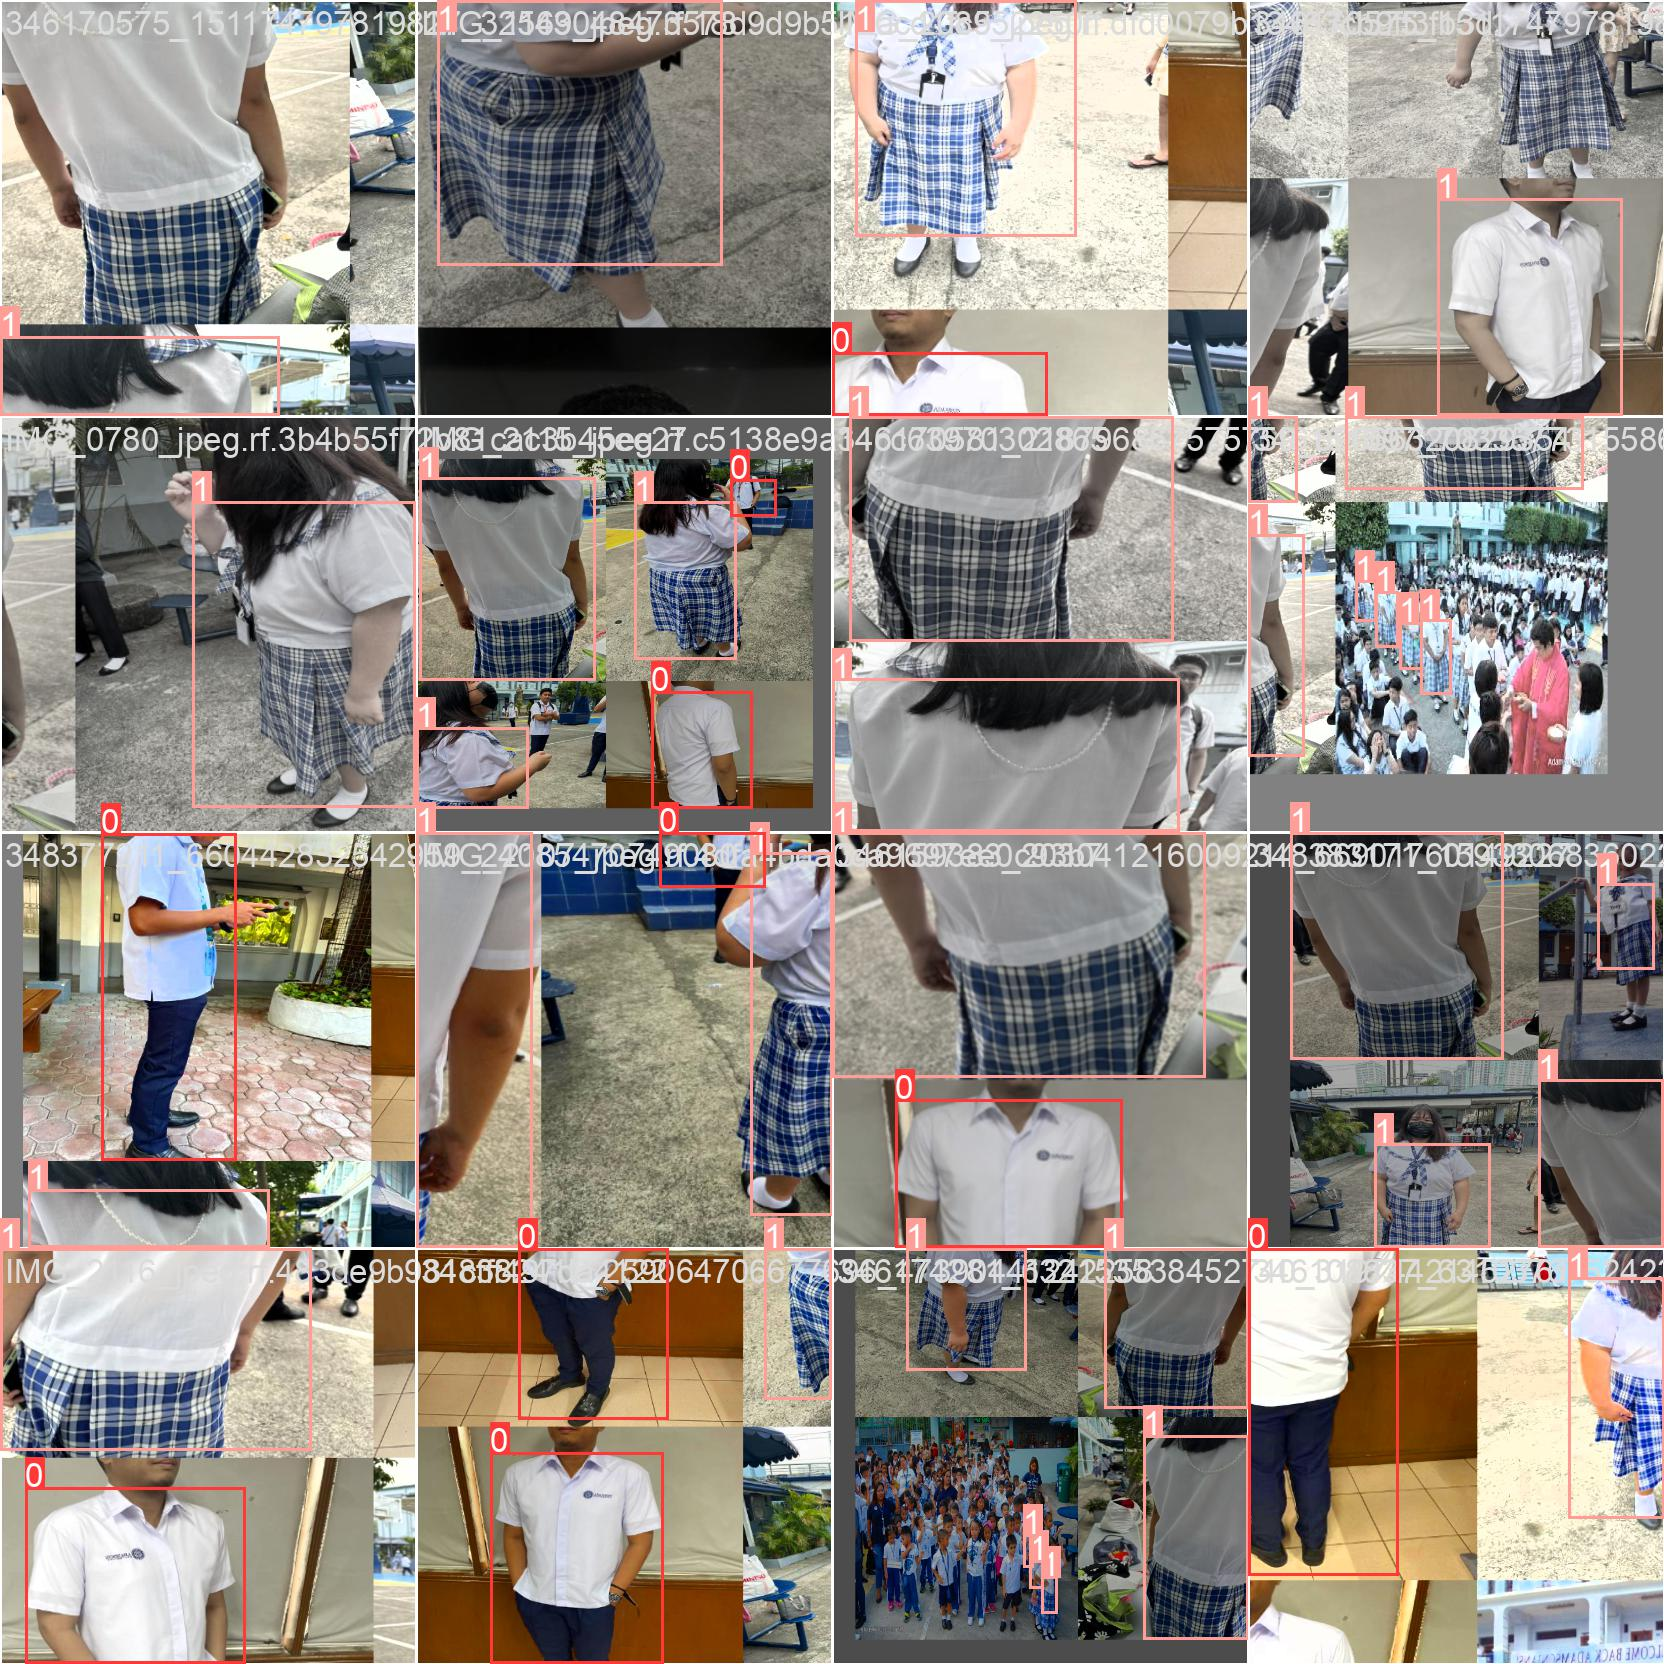

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

detect/  train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File 

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Deploy Model Weights to Roboflow

Now that you have trained your custom detector, you can upload it to Roboflow to deploy you model to a Hosted API and edge containers.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov5", model_path=f"/content/yolov5/runs/train/yolov5s_results/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on IMG_2101_jpeg.rf.2877227753af4d31f43069dbed2dbe78.jpg


{'predictions': [{'x': 298.0,
   'y': 332.5,
   'width': 296.0,
   'height': 615.0,
   'confidence': 0.7593445777893066,
   'class': 'College',
   'image_path': '/content/yolov5/Final-Project-for-Machine-Learning-3/test/images/IMG_2101_jpeg.rf.2877227753af4d31f43069dbed2dbe78.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

# Using the Model for a new Photo

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 783, 'y': 1604, 'width': 818, 'height': 886, 'confidence': 0.6682625412940979, 'class': 'Highschool', 'image_path': '/content/TESTINGMODEL/TESTING4.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 786, 'y': 1611, 'width': 804, 'height': 848, 'confidence': 0.6279765963554382, 'class': 'Highschool', 'image_path': '/content/TESTINGMODEL/TESTING4.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 789, 'y': 1604, 'width': 720, 'height': 816, 'confidence': 0.5944494009017944, 'class': 'Highschool', 'image_path': '/content/TESTINGMODEL/TESTING4.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 789, 'y': 1628, 'width': 748, 'height': 825, 'confidence': 0.5673449039459229, 'class': 'Highschool', 'image_path': '/content/TESTINGMODEL/TESTING4.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 781, 'y': 1620, 'width': 717, 'height': 854, 'confidence': 0.5518879890441895, 'class': 'Highschool', '

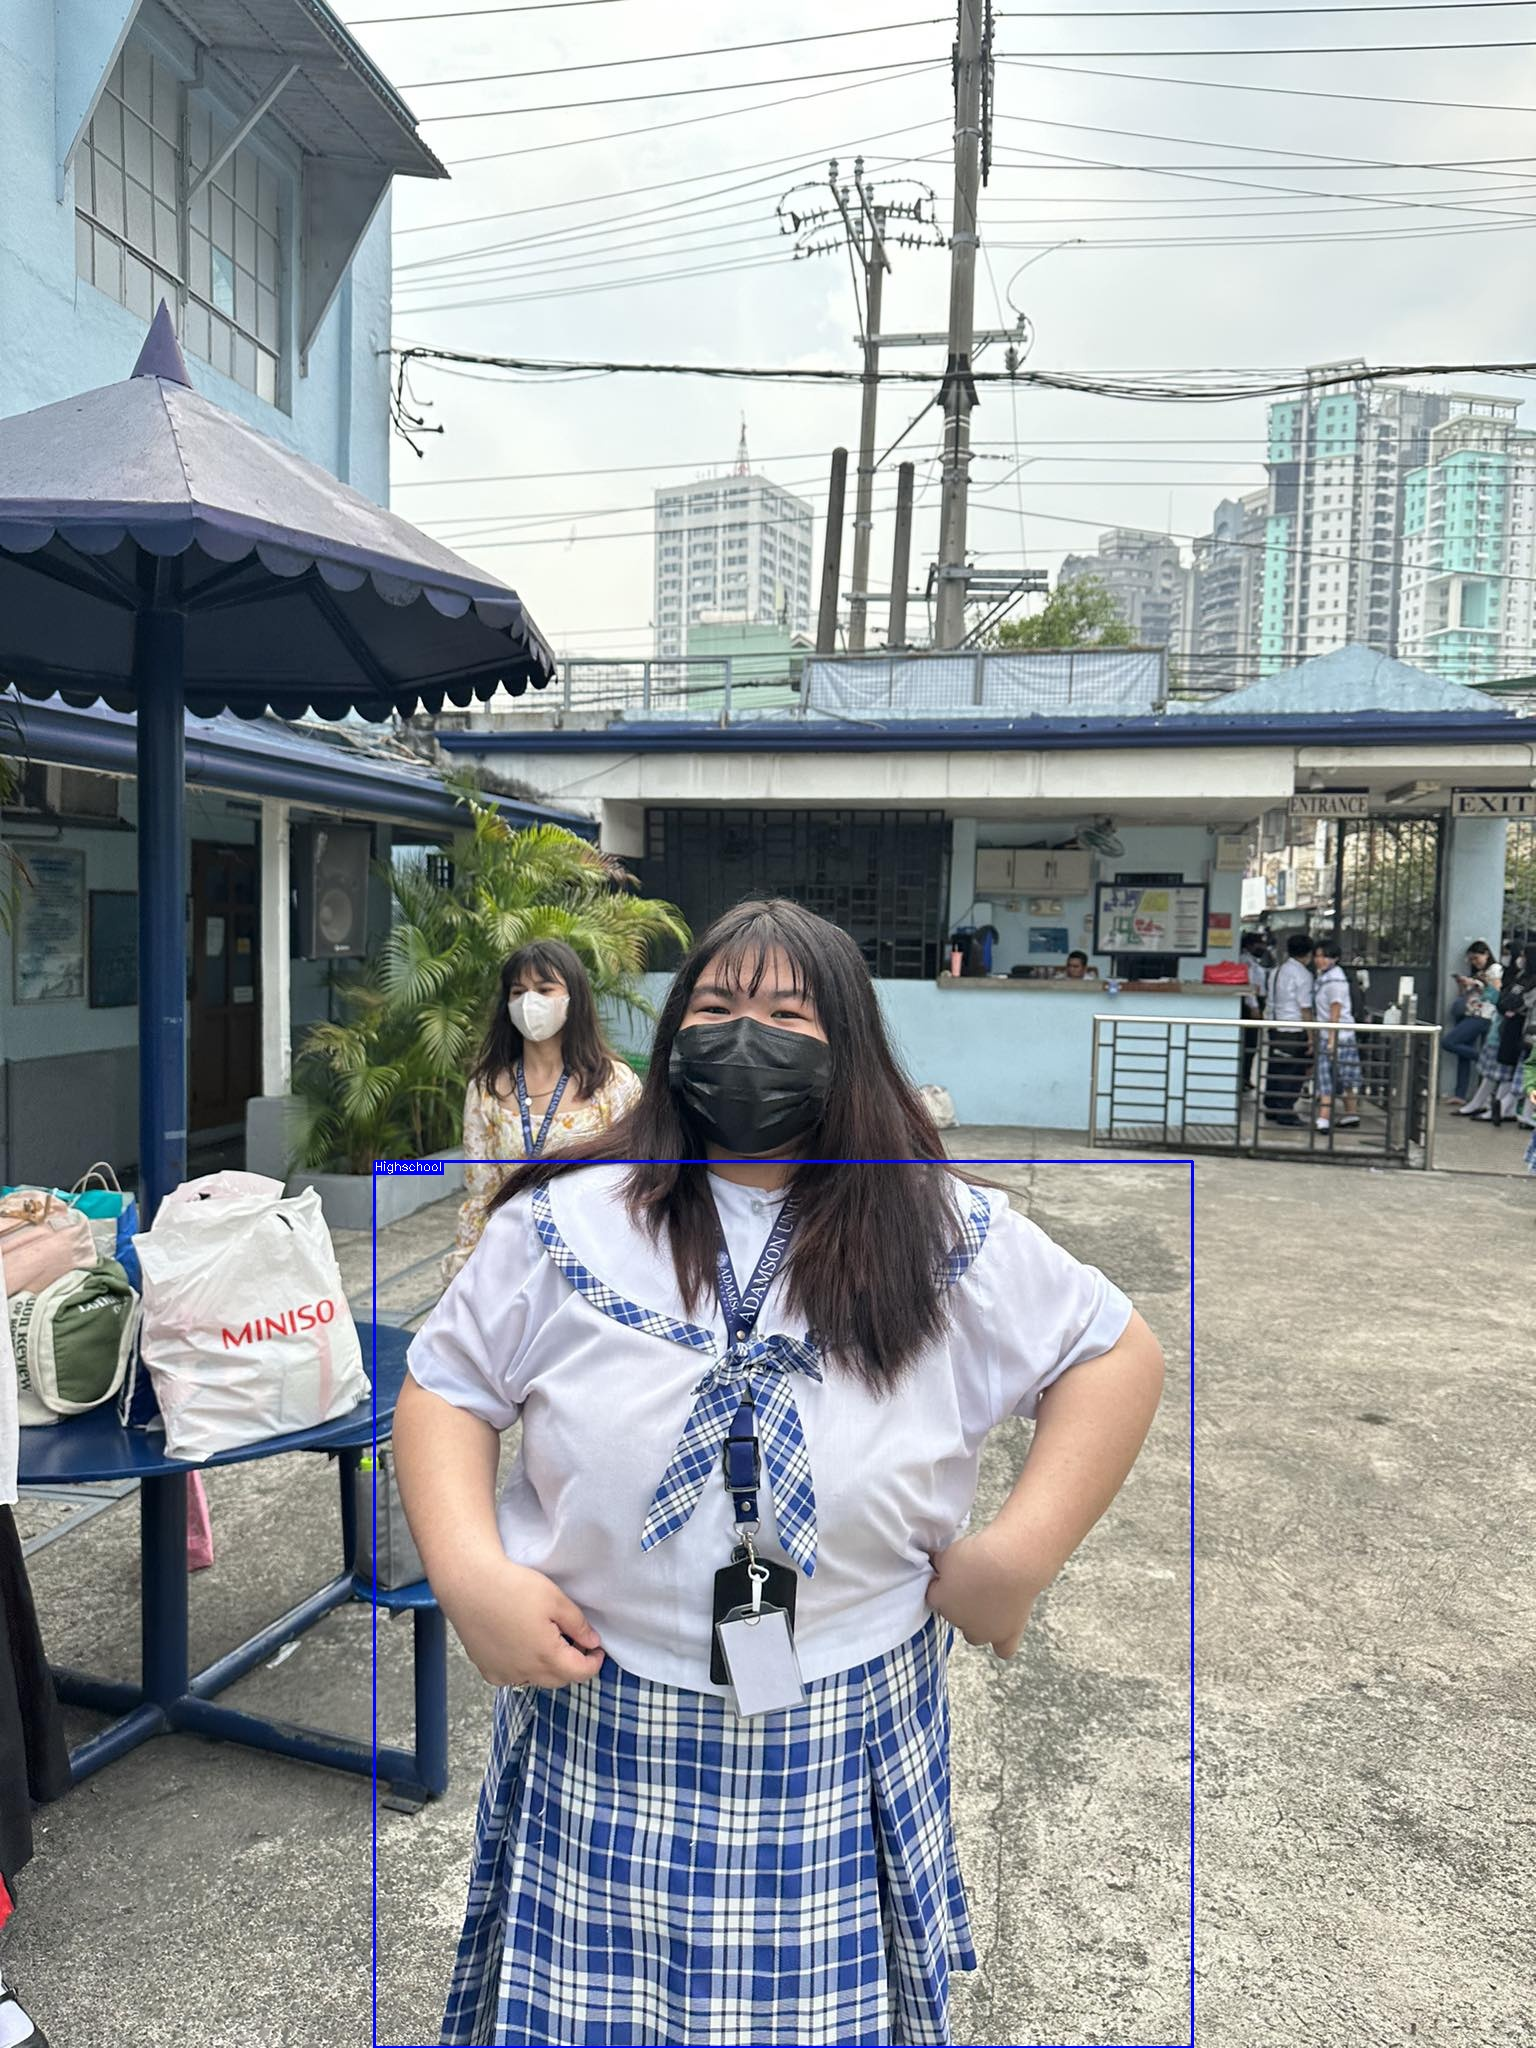

In [ ]:
from roboflow import Roboflow
from IPython.display import Image
rf = Roboflow(api_key="BpPamx1h0c71YxgLC2v2")
project = rf.workspace().project("final-project-for-machine-learning")
model = project.version(3).model

# infer on a local image
print(model.predict("/content/TESTINGMODEL/TESTING4.jpg", confidence=39, overlap=350).json())

# visualize your prediction
model.predict("/content/TESTINGMODEL/TESTING4.jpg", confidence=30, overlap=30).save("/content/TESTINGMODEL/result1.jpg")


# Path to your image file
image_path = '/content/TESTINGMODEL/result1.jpg'

# Display the image
Image(filename=image_path, width=800, height=800)

#try mo dito bri KUNG GAGANA NA pang picture to bro

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import tensorflow

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Set the model to inference mode
model.eval()

# Define the transformation to be applied to the input image
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a tensor
])

# Function to perform object detection on an image
def detect_objects(image_path):
    # Load the image
    image = Image.open('/content/TESTINGMODEL/TESTING1.jpg')

    # Apply the transformation
    image = transform(image).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        detections = model(image)

    return detections

# Path to your input image
image_path = "your_image.jpg"

# Perform object detection
detections = detect_objects(image_path)

# Print the predicted objects and their bounding boxes
print(detections.pandas().xyxy[0])


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AttributeError: ignored

# Using the Model for my Webcam on Google Colab

In [ ]:
from roboflow import Roboflow
import cv2
import base64

# Instantiate Roboflow client
rf = Roboflow(api_key="BpPamx1h0c71YxgLC2v2")

# Load the model
project = rf.workspace().project("final-project-for-machine-learning")
model = project.version(3).model

# Function to perform object detection on an image
def detect_objects(image):
    # Convert the image to base64 string
    _, img_encoded = cv2.imencode('.jpg', image)
    image_base64 = base64.b64encode(img_encoded).decode('utf-8')

    # Perform object detection
    predictions = model.predict(image_base64, confidence=40, overlap=30).json()

    return predictions

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Perform object detection
    predictions = detect_objects(frame)

    # Print the predictions
    print(predictions)

    # Display the frame
    cv2.imshow('Object Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


#OPENING IMAGE THROUGH PYCHARM

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from torch.autograd import Variable

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='/content/yolov5/runs/train/yolov5s_results/weights/last.pt')

# Set the model to inference mode
model.eval()

# Define the transformation to be applied to the input image
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a tensor
])

# Function to perform object detection on an image
def detect_objects(image_path):
    # Load the image
    image = Image.open(image_path)

    # Apply the transformation
    image = transform(image).unsqueeze(0)

    # Convert the image to a variable
    image = Variable(image)

    # Perform inference
    with torch.no_grad():
        detections = model(image)

    return detections

# Path to your input image
image_path = "your_image.jpg"

# Perform object detection
detections = detect_objects(image_path)

# Print the predicted objects and their bounding boxes
print(detections.pandas().xyxy[0])


#USING THE MODEL ON A WEBCAM USING PYCHARM

In [ ]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
from torch.autograd import Variable

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='/content/yolov5/runs/train/yolov5s_results/weights/last.pt')

# Set the model to inference mode
model.eval()

# Define the transformation to be applied to the input image
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a tensor
])

# Function to perform object detection on an image
def detect_objects(image):
    # Apply the transformation
    image = transform(image).unsqueeze(0)

    # Convert the image to a variable
    image = Variable(image)

    # Perform inference
    with torch.no_grad():
        detections = model(image)

    return detections

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Convert the frame to PIL Image format
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Perform object detection
    detections = detect_objects(image)

    # Extract the bounding box coordinates and class labels
    boxes = detections.xyxy[0].numpy()
    class_labels = detections.names[0]

    # Loop through the detected objects and draw bounding boxes on the frame
    for box in boxes:
        x1, y1, x2, y2, confidence, class_index = box.tolist()
        label = class_labels[int(class_index)]

        # Draw the bounding box and label on the frame
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame with bounding boxes
    cv2.imshow('Object Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()
